# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [ ]:
# mount google drive in to your Colab enviornment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/Quarter2_AIC/DL_Assignments

/content/drive/MyDrive/Colab_Notebooks/Quarter2_AIC/DL_Assignments


# Loading Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Load Data

In [ ]:
car_data = pd.read_csv('./datasets/CarPrice_Assignment.csv')
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
car_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

## 2.Check Missing Values 

( If Exist ; Fill each record with mean of its feature )

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#check if there are empty cells, if there are then row and column indexes will be returned where values are empty or missing
np.where(car_data.applymap(lambda x: x ==''))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [ ]:
car_data.duplicated().any()


False

In [ ]:
x=car_data.iloc[:,:-1]
y=car_data.iloc[:,-1]

In [ ]:
x.drop(x.select_dtypes(include='object'),axis=1,inplace=True)
x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [ ]:
print(f"Shape of input: {x.shape}\nShape of output: {y.shape} ")

Shape of input: (205, 15)
Shape of output: (205,) 


## 3.Data Split

In [ ]:
x_train= x.sample(frac=0.7, replace=True, random_state=1,axis=0)
y_train= y.sample(frac=0.7, replace=True, random_state=1,axis=0)

In [ ]:
x_test= x.sample(frac=0.3, replace=True, random_state=1,axis=0)
y_test=  y.sample(frac=0.3, replace=True, random_state=1,axis=0)

In [ ]:
display(f"Training Data Shape: {x_train.shape}")
display(f"Training Label Shape:  {y_train.shape}")

'Training Data Shape: (144, 15)'

'Training Label Shape:  (144,)'

In [ ]:
display(f"Testing Data Shape: {x_test.shape}")
display(f"Testing Label Shape:  {y_test.shape}")

'Testing Data Shape: (62, 15)'

'Testing Label Shape:  (62,)'

In [ ]:
x_train = np.asarray(x_train).astype("float32")
x_test = np.asarray(x_test).astype("float32")

## 4.Normalizing Data

In [ ]:
mean = x_train.mean(axis=0)
x_train-= mean
std = x_train.std(axis=0)
x_train/= std
x_test-= mean
x_test/= std

In [ ]:
y_mean = y_train.mean(axis=0)
y_train-= y_mean
y_std = y_train.std(axis=0)
y_train/= y_std
y_test-= y_mean
y_test/= y_std

In [ ]:
val_x = x_train[:30]
partial_x_train =x_train[30:]

val_y = y_train[:30]
partial_y_train = y_train[30:]

## 4.Build Model

In [ ]:

network=models.Sequential()
network.add(layers.Dense(10,activation="relu" ,input_shape=(x_train.shape[1],)))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(8,activation="relu"))
#network.add(layers.Dropout(0.2))
network.add(layers.Dense(6,activation="relu"))
network.add(layers.Dense(1))
network.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])



In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                160       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = network.fit(partial_x_train, partial_y_train,epochs=45, batch_size=1, verbose=1,validation_data=(val_x,val_y))

Epoch 1/45
114/114 [==============================] - 1s 3ms/step - loss: 0.6819 - mae: 0.6813 - val_loss: 1.1481 - val_mae: 0.8909
Epoch 2/45
114/114 [==============================] - 0s 2ms/step - loss: 0.8324 - mae: 0.7028 - val_loss: 1.0215 - val_mae: 0.8340
Epoch 3/45
114/114 [==============================] - 0s 1ms/step - loss: 0.7155 - mae: 0.6552 - val_loss: 0.8265 - val_mae: 0.7590
Epoch 4/45
114/114 [==============================] - 0s 2ms/step - loss: 0.7567 - mae: 0.6741 - val_loss: 0.6907 - val_mae: 0.6945
Epoch 5/45
114/114 [==============================] - 0s 2ms/step - loss: 0.2913 - mae: 0.4473 - val_loss: 0.5113 - val_mae: 0.6013
Epoch 6/45
114/114 [==============================] - 0s 2ms/step - loss: 0.4875 - mae: 0.5000 - val_loss: 0.4422 - val_mae: 0.5512
Epoch 7/45
114/114 [==============================] - 0s 2ms/step - loss: 0.4353 - mae: 0.4687 - val_loss: 0.3795 - val_mae: 0.5038
Epoch 8/45
114/114 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

## 5.Plotting the Validation Scores

### Training and Validation loss

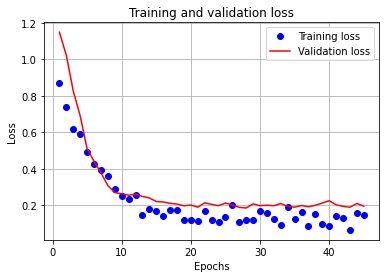

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"bo",label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Training and Validation MAE

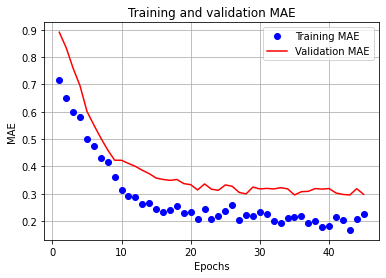

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, mae,"bo",label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid()
plt.show()

## 6.Results

In [ ]:
(loss , mae ) = network.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1440 - mae: 0.2511


In [ ]:
loss

0.14402171969413757

In [ ]:
mae

0.25111183524131775

In [ ]:
result= network.predict(x_test)
result[5]

array([0.27642292], dtype=float32)

## 7.Comparison between Actual and Predicted Price

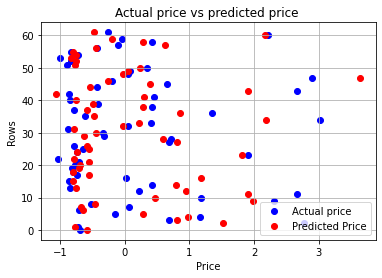

In [ ]:
y=result_1
y1=range(62)
x=y_test
plt.scatter(x, y1, label= "Actual price", color= "blue",  )
plt.scatter(y, y1, label= "Predicted Price", color= "red", )
plt.xlabel('Price')
plt.ylabel('Rows')
plt.title('Actual price vs predicted price ')
plt.legend()
plt.grid()
plt.show()

**<h4 align="right"> AIC Deep Learning Assignment Submitted by : PIAIC101499 </h4>**


